# Loops and functions
* Can I automate operations in Python?
* What are functions and why should I use them?

## For loops

In [1]:
animals = ['lion', 'tiger', 'crocodile']

In [2]:
print(animals)

['lion', 'tiger', 'crocodile']


In [5]:
for creature in animals:
    print('sven is cool')
    print(creature)
print('sven is not cool')

sven is cool
lion
sven is cool
tiger
sven is cool
crocodile
sven is not cool


## USe for loops to automate reading in subsets of data

In [6]:
import pandas as pd
surveys_df = pd.read_csv('data/surveys.csv')

In [7]:
surveys_2002 = surveys_df[surveys_df.year == 2002]

In [8]:
surveys_2002

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [9]:
import os
os.mkdir('data/yearly_files')

In [11]:
surveys_2002.to_csv('data/yearly_files/surveys2002.csv')

In [12]:
all_the_years = surveys_df['year'].unique()

In [13]:
all_the_years

array([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002])

In [17]:
for year in all_the_years:
    filename = f'data/yearly_files/surveys{year}.csv'
    surveys_for_one_year = surveys_df[surveys_df.year == year]
    surveys_for_one_year.to_csv(filename)

In [16]:
name = 'sven'
age = '29'
print(f'{name} is {age}')

sven is 29


In [26]:
def subset_by_year(year, df):
    """
    Selects the data given 'year' input argument
    Writes the data to the yearly_files folder for that specific year.
    """
    filename = f'data/yearly_files/surveys{year}.csv'
    surveys_for_one_year =df[df.year == year]
    surveys_for_one_year.to_csv(filename, index=False)
    return surveys_for_one_year

In [25]:
subset_by_year(2001, surveys_df)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
31710,31711,1,21,2001,1,PB,F,26.0,25.0
31711,31712,1,21,2001,1,DM,M,37.0,43.0
31712,31713,1,21,2001,1,PB,M,29.0,44.0
31713,31714,1,21,2001,1,DO,M,34.0,53.0
31714,31715,1,21,2001,2,OT,M,20.0,27.0
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


In [21]:
help(subset_by_year)

Help on function subset_by_year in module __main__:

subset_by_year(year, df)
    Selects the data given 'year' input argument
    Writes the data to the yearly_files folder for that specific year.



In [27]:
for year in all_the_years:
    subset_by_year(year, surveys_df)

In [28]:
%matplotlib inline

import plotnine as p9

In [29]:
surveys_complete = surveys_df.dropna()

In [38]:
surveys_plot = p9.ggplot(data=surveys_complete,
          mapping = p9.aes(x='weight', 
                           y='hindfoot_length', 
                           color='species_id'))


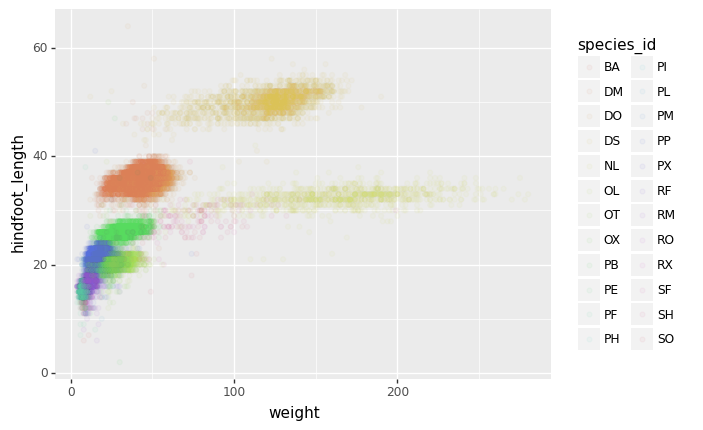

<ggplot: (2995239665118)>

In [39]:
surveys_plot + p9.geom_point(alpha=0.05)